In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from models.single_layer_perceptron import SingleLayerPerceptron

In [33]:
ticker = 'B3SA3.SA'
prices = yf.Ticker(ticker).history('max')
prices = prices.drop(['Volume', 'Dividends', 'Stock Splits'], 1)
prices.head()

<ipython-input-33-fde6207d9880>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  prices = prices.drop(['Volume', 'Dividends', 'Stock Splits'], 1)


,Open,High,Low,Close
Date,,,,
2007-10-26,19.503835,21.533454,17.681445,21.326225
2007-10-29,21.088521,21.088521,19.503836,19.503836
2007-10-30,19.503842,19.656216,18.900442,18.985771
2007-10-31,19.211274,20.113326,19.192989,19.808578
2007-11-01,19.869535,20.101144,19.272231,20.076763


In [34]:
y = prices.Close.shift(-1)
prices['y'] = y

In [35]:
prices.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [36]:
prices['SMA_5'] = prices.ta.sma(5)
prices['SMA_30'] = prices.ta.sma(30)
prices['SMA_60'] = prices.ta.sma(60)
prices['SMA_180'] = prices.ta.sma(180)
prices['RSI_5'] = prices.ta.rsi(5)
prices['RSI_30'] = prices.ta.rsi(30)
prices['RSI_60'] = prices.ta.rsi(60)
prices['RSI_180'] = prices.ta.rsi(180)
prices = pd.concat([prices, ta.donchian(prices["High"], prices["Low"], lower_length=10, upper_length=15)], 1)
prices =  prices.dropna()

columns = list(prices.columns)
columns.remove('y')

<ipython-input-36-22fe22694cb1>:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  prices = pd.concat([prices, ta.donchian(prices["High"], prices["Low"], lower_length=10, upper_length=15)], 1)


In [37]:
trading_threshold = '2021-10-31'
prices.index = pd.to_datetime(prices.index)
train_prices = prices[(prices.index <= trading_threshold) & (prices.index.year >= 2016)]
test_prices = prices[prices.index > trading_threshold]

In [38]:
train_X = train_prices.drop('y', 1)
train_y = train_prices.y
test_X = test_prices.drop('y', 1)
test_y = test_prices.y

<ipython-input-38-9edf73517eb2>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_X = train_prices.drop('y', 1)
<ipython-input-38-9edf73517eb2>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_X = test_prices.drop('y', 1)


In [39]:
from sklearn.metrics import mean_absolute_error

def plot_graphs(slp, train_X, test_X, train_y, test_y):
    pred_train = slp.predict(train_X)
    pred_test = slp.predict(test_X)
    print(mean_absolute_error(test_y, pred_test))

    df = pd.DataFrame()
    df['pred'] = pred_train
    df['y'] = train_y
    df.plot(figsize=(15, 5), title='Trained')

    df = pd.DataFrame()
    df['pred'] = pred_test
    df['y'] = test_y
    df.plot(figsize=(15, 5), title='Predicted')

In [40]:
slp = SingleLayerPerceptron(train_X.shape[1], 50, 1, 'sigmoid')
X = train_X.to_numpy()
y = train_y.to_numpy()
slp.train(X, y)
slp.saved_errors[-5:]


Época: 1 Erro: 27.72087913378912
Época: 2 Erro: -410.8838669490241
Época: 3 Erro: 5551.041042481317
Época: 4 Erro: -95069.68750563524
Época: 5 Erro: 1304466.6012228448
Época: 6 Erro: -17623343.782520633
Época: 7 Erro: 307044357.6641706
Época: 8 Erro: -4217122255.205261
Época: 9 Erro: 56973321667.82308
Época: 10 Erro: -992401304234.4835
Época: 11 Erro: 13630033348710.064
Época: 12 Erro: -184141750541072.97
Época: 13 Erro: 3207519504303511.0
Época: 14 Erro: -4.4053352957634056e+16
Época: 15 Erro: 5.95160798457636e+17
Época: 16 Erro: -1.0366958023080376e+19
Época: 17 Erro: 1.4238393852773355e+20
Época: 18 Erro: -1.923607009509681e+21
Época: 19 Erro: 3.3506832408584707e+22
Época: 20 Erro: -4.6019620755008846e+23
Época: 21 Erro: 6.217250764001697e+24
Época: 22 Erro: -1.0829674583238102e+26
Época: 23 Erro: 1.4873907242061853e+27
Época: 24 Erro: -2.0094648684025565e+28
Época: 25 Erro: 3.5002369113456586e+29


c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\activation_functions.py:5: RuntimeWarning: overflow encountered in exp
  'sigmoid': lambda x: 1/(1 + np.exp(-x)),


Época: 26 Erro: -4.807365054641367e+30
Época: 27 Erro: 6.494750188820486e+31
Época: 28 Erro: -1.1313043934403586e+33
Época: 29 Erro: 1.5537785998309955e+34
Época: 30 Erro: -2.0991548883716752e+35
Época: 31 Erro: 3.6564657279881753e+36
Época: 32 Erro: -5.0219359458918275e+37
Época: 33 Erro: 6.784635462899861e+38
Época: 34 Erro: -1.1817987888559348e+40
Época: 35 Erro: 1.6231296175261836e+41
Época: 36 Erro: -2.1928481132778746e+42
Época: 37 Erro: 3.8196676278155737e+43
Época: 38 Erro: -5.246083947856555e+44
Época: 39 Erro: 7.087459413554205e+45
Época: 40 Erro: -1.2345469401865137e+47
Época: 41 Erro: 1.695576033533514e+48
Época: 42 Erro: -2.2907232213037783e+49
Época: 43 Erro: 3.990153845913295e+50
Época: 44 Erro: -5.4802365232220515e+51
Época: 45 Erro: 7.403799542872994e+52
Época: 46 Erro: -1.28964944108576e+54
Época: 47 Erro: 1.771256007191223e+55
Época: 48 Erro: -2.392966865715342e+56
Época: 49 Erro: 4.1682495089663045e+57
Época: 50 Erro: -5.724840213951966e+58
Época: 51 Erro: 7.7342591

c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:45: RuntimeWarning: overflow encountered in matmul
  JWh =  X.T @ Eh
C:\Users\leonardo.paz\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:48: RuntimeWarning: invalid value encountered in subtract
  self.hidden_weights -= self.learning_rate * JWh
c:\Users\leonardo.paz\Documents\GitHub\constellation-talks-01\models\single_layer_perceptron.py:49: RuntimeWarning: invalid value encountered in subtract
  self.hidden_bias -= self.learning_rate * Jbh


[1.3644310300196634e+151,
 -2.3766684998363863e+152,
 3.264211361106939e+153,
 -4.409949548855475e+154,
 nan]

Época: 1 Erro: 29.042377546346017
Época: 2 Erro: 26.893212565538878
Época: 3 Erro: 24.903087942476443
Época: 4 Erro: 22.41503169480075
Época: 5 Erro: 13.674824407990927
Época: 6 Erro: 8.148091818710142
Época: 7 Erro: 4.935384857696938
Época: 8 Erro: 3.4198372427567625
Época: 9 Erro: 2.416680576469288
Época: 10 Erro: 1.7505882607699843
Época: 11 Erro: 1.3492656697805492
Época: 12 Erro: 1.05807415733863
Época: 13 Erro: 0.8388626427815272
Época: 14 Erro: 0.6746130838052632
Época: 15 Erro: 0.5504751689006141
Época: 16 Erro: 0.45757664321055774
Época: 17 Erro: 0.3875605603162868
Época: 18 Erro: 0.3343134993199217
Época: 19 Erro: 0.2937088626894599
Época: 20 Erro: 0.2627785525462665
Época: 21 Erro: 0.23926787780502848
Época: 22 Erro: 0.2214331535636202
Época: 23 Erro: 0.20792480073189493
Época: 24 Erro: 0.197702722380406
Época: 25 Erro: 0.18996932140634018
Época: 26 Erro: 0.18411567407919524
Época: 27 Erro: 0.17967863476519122
Época: 28 Erro: 0.17630705975398941
Época: 29 Erro: 0.17373547511

C:\Users\leonardo.paz\AppData\Roaming\Python\Python38\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


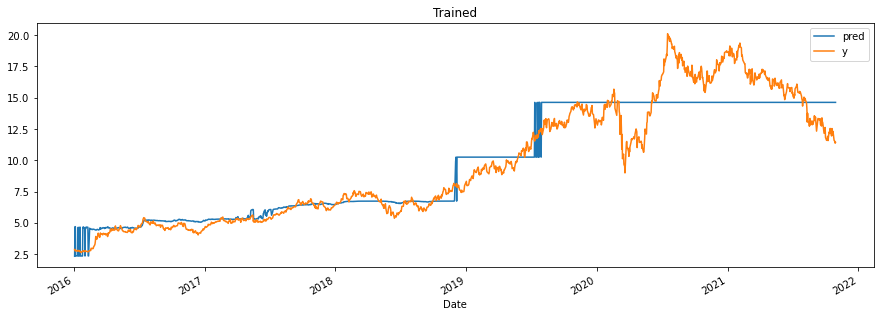

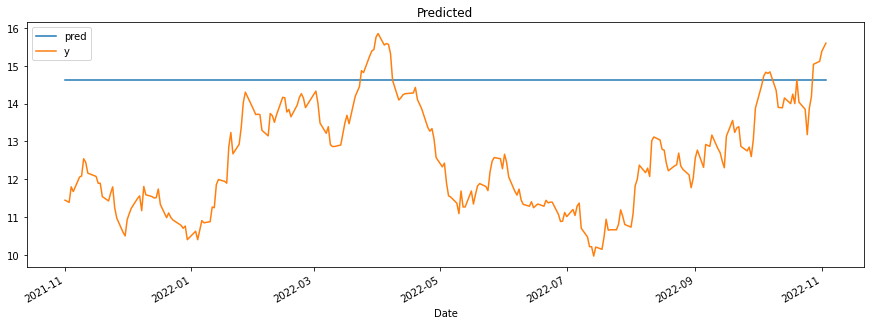

In [41]:
size = train_X.shape[1]
slp =  SingleLayerPerceptron(size, 50, 1, 'sigmoid')
slp.learning_rate = 1e-6
slp.train(train_X.to_numpy(), train_y.to_numpy())
plot_graphs(slp, train_X, test_X, train_y, test_y)
pd.Series(slp.saved_errors).plot()

Época: 1 Erro: 28.62612336375194
Época: 2 Erro: 26.507761608710936
Época: 3 Erro: 24.54616074190472
Época: 4 Erro: 22.662368293588244
Época: 5 Erro: 15.23611890247142
Época: 6 Erro: 8.88901660838615
Época: 7 Erro: 5.204009814915109
Época: 8 Erro: 3.5416986099402386
Época: 9 Erro: 2.507007301611826
Época: 10 Erro: 1.8579905653090587
Época: 11 Erro: 1.4399005423884437
Época: 12 Erro: 1.1402536657119755
Época: 13 Erro: 0.9214042321332215
Época: 14 Erro: 0.7549169520977017
Época: 15 Erro: 0.6292846344741182
Época: 16 Erro: 0.5341562186288614
Época: 17 Erro: 0.46024587923525273
Época: 18 Erro: 0.4019083398829773
Época: 19 Erro: 0.35554288905782727
Época: 20 Erro: 0.31859378806972466
Época: 21 Erro: 0.2891148572064615
Época: 22 Erro: 0.2655738687415612
Época: 23 Erro: 0.24675496826176466
Época: 24 Erro: 0.2316917180275653
Época: 25 Erro: 0.219615274142348
Época: 26 Erro: 0.2099140100673377
Época: 27 Erro: 0.20210181631578159
Época: 28 Erro: 0.19579286327612538
Época: 29 Erro: 0.1906813072094

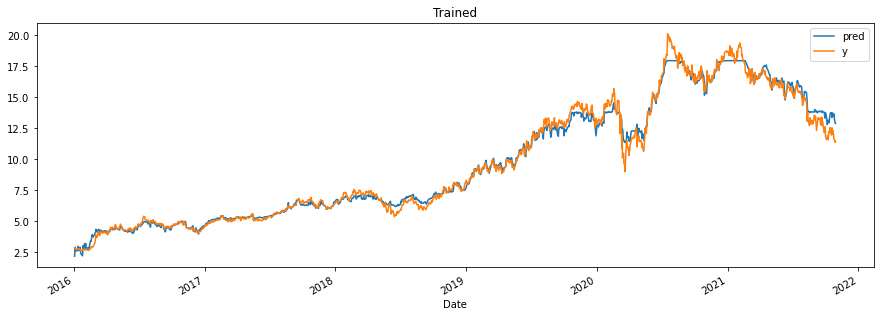

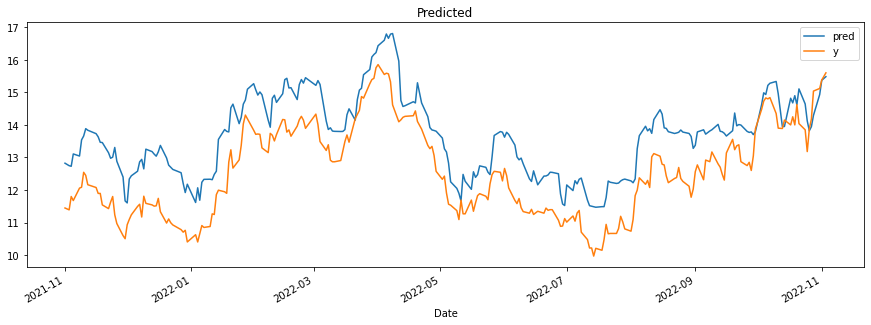

In [42]:
slp =  SingleLayerPerceptron(size, 50, 1, 'sigmoid')
slp.learning_rate = 1e-6
slp.max_iter_num = 20000
slp.min_loss_error = 0.015

slp.train(train_X.to_numpy(), train_y.to_numpy())
plot_graphs(slp, train_X, test_X, train_y, test_y)